<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Denoising - Marcenko-Pastur Theory



# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
from scipy.stats import norm
import requests
from io import StringIO
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Loading the data
<hr style = "border:2px solid black" ></hr>

In [2]:
def getDailyData(symbol, start, end):
    pd = pdr.get_data_yahoo(symbol, start, end)
    return pd

In [3]:
getDailyData(["IBM", "MSFT", "INTC"], '2020-01-01', '2020-12-21')

Attributes   Adj Close                              Close              \
Symbols            IBM        MSFT       INTC         IBM        MSFT   
Date                                                                    
2020-01-02  112.916939  156.591980  56.406246  129.464630  160.619995   
2020-01-03  112.016411  154.642181  55.720173  128.432129  158.619995   
2020-01-06  111.816284  155.041885  55.562561  128.202682  159.029999   
2020-01-07  111.891312  153.628250  54.635445  128.288712  157.580002   
2020-01-08  112.825211  156.075287  54.672527  129.359467  160.089996   
...                ...         ...        ...         ...         ...   
2020-12-15  110.510719  210.971619  48.145493  120.391968  214.130005   
2020-12-16  110.177246  216.045654  48.573078  120.028679  219.279999   
2020-12-17  110.177246  216.183609  48.126495  120.028679  219.419998   
2020-12-18  110.440514  215.365829  45.095432  120.315491  218.589996   
2020-12-21  108.281731  219.306824  44.050228  117.963669  222.589996   

Attributes                   High                                Low  \
Symbols          INTC         IBM        MSFT       INTC         IBM   
Date                                                                   
2020-01-02  60.840000  129.942642  160.729996  60.970001  128.843216   
2020-01-03  60.099998  128.929260  159.949997  60.700001  127.686424   
2020-01-06  59.930000  128.336517  159.100006  60.200001  127.342255   
2020-01-07  58.930000  129.024857  159.669998  59.799999  127.533463   
2020-01-08  58.970001  129.885284  160.800003  59.320000  128.030594   
...               ...         ...         ...        ...         ...   
2020-12-15  50.669998  120.391968  215.419998  51.009998  118.011475   
2020-12-16  51.119999  121.003822  220.110001  51.459999  119.780113   
2020-12-17  50.650002  120.544930  220.889999  51.320000  119.416824   
2020-12-18  47.459999  120.841301  219.690002  50.680000  119.474190   
2020-12-21  46.360001  118.718925  224.000000  46.450001  116.367111   

Attributes                               Open                         \
Symbols           MSFT       INTC         IBM        MSFT       INTC   
Date                                                                   
2020-01-02  158.330002  60.220001  129.063095  158.779999  60.240002   
2020-01-03  158.059998  59.810001  127.695984  158.320007  59.810001   
2020-01-06  156.509995  59.330002  127.552582  157.080002  59.590000   
2020-01-07  157.320007  58.889999  127.810707  159.320007  59.779999   
2020-01-08  157.949997  58.520000  128.594650  158.929993  58.889999   
...                ...        ...         ...         ...        ...   
2020-12-15  212.240005  50.209999  118.919693  215.169998  50.980000   
2020-12-16  214.720001  50.680000  120.391968  214.750000  50.709999   
2020-12-17  217.919998  50.220001  120.535370  219.869995  51.150002   
2020-12-18  216.020004  47.110001  120.066925  218.589996  50.570000   
2020-12-21  217.279999  45.240002  118.518166  217.550003  46.320000   

Attributes     Volume                           
Symbols           IBM        MSFT         INTC  
Date                                            
2020-01-02  3293436.0  22622100.0   18056000.0  
2020-01-03  2482890.0  21116200.0   15293900.0  
2020-01-06  2537073.0  20813700.0   17755200.0  
2020-01-07  3232977.0  21634100.0   21876100.0  
2020-01-08  4545916.0  27746500.0   23133500.0  
...               ...         ...          ...  
2020-12-15  4556585.0  27000600.0   25465600.0  
2020-12-16  4738485.0  35023300.0   28351000.0  
2020-12-17  3962248.0  32515800.0   26399000.0  
2020-12-18  7900229.0  63354900.0  119298400.0  
2020-12-21  6397022.0  37181900.0   53775700.0  

[246 rows x 18 columns]

In [4]:
stocks = getDailyData(["IBM", "MSFT", "INTC"], '2020-01-01', '2020-12-31')["Close"]

In [5]:
# Calculating logarithmic return; normalising data so they are comparable
stocks_returns = (np.log(stocks) - np.log(stocks.shift(1))).dropna()

In [6]:
stocks

Symbols,IBM,MSFT,INTC
Date,,,
2020-01-02,129.464630,160.619995,60.840000
2020-01-03,128.432129,158.619995,60.099998
2020-01-06,128.202682,159.029999,59.930000
2020-01-07,128.288712,157.580002,58.930000
2020-01-08,129.359467,160.089996,58.970001
...,...,...,...
2020-12-24,119.206497,222.750000,47.070000
2020-12-28,119.330788,224.960007,47.070000
2020-12-29,118.355644,224.149994,49.389999


In [7]:
stocks_returns

Symbols,IBM,MSFT,INTC
Date,,,
2020-01-03,-0.008007,-0.012530,-0.012238
2020-01-06,-0.001788,0.002581,-0.002833
2020-01-07,0.000671,-0.009160,-0.016827
2020-01-08,0.008312,0.015803,0.000679
2020-01-09,0.010513,0.012416,0.005580
...,...,...,...
2020-12-24,0.006356,0.007797,0.010679
2020-12-28,0.001042,0.009873,0.000000
2020-12-29,-0.008205,-0.003607,0.048112


# The Marcenko-Pastur Theory
<hr style = "border:2px solid black" ></hr>


- The Marchenko–Pastur theorem allows us to extract signal from noise using eigenvalues of covariance matrices.

-  Eigenvectors represent the variance in covariance matrix, while an eigenvalue shows the magni‐ tude of an eigenvector. Specifically, the largest eigenvector corresponds to largest var‐ iance, and the magnitude of this is equal to the corresponding eigenvalue. Due to noise in the data, some eigenvalues can be thought of as random, and it makes sense to detect and filter out these eigenvalues to retain only signals.

- After denoising the covariance matrix you can use this in the VaR model. In this case the VaR will be called **denoised VaR** estimation. Denoising the covariance matrix is nothing but taking unnecessary information (noise) out of the data.
    


In [8]:
def mp_pdf(sigma2, q, obs):
    # Calculating maximum expected eigenvalue
    lambda_plus = sigma2 * (1 + q ** 0.5) ** 2
    # Calculating minimum expected eigenvalue
    lambda_minus = sigma2 * (1 - q ** 0.5) ** 2
    l = np.linspace(lambda_minus, lambda_plus, obs)
    # Generating probability density function of Marchenko-Pastur distribution
    pdf_mp = 1 / (2 * np.pi * sigma2 * q * l) \
        * np.sqrt((lambda_plus - l)
                  * (l - lambda_minus))
    pdf_mp = pd.Series(pdf_mp, index=l)
    return pdf_mp

In [9]:
from sklearn.neighbors import KernelDensity


def kde_fit(bandwidth, obs, x=None):
    # Initiating kernel density estimation
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    if len(obs.shape) == 1:
        # Fitting kernel density to the observations
        kde_fit = kde.fit(np.array(obs).reshape(-1, 1))
    if x is None:
        x = np.unique(obs).reshape(-1, 1)
    if len(x.shape) == 1:
        x = x.reshape(-1, 1)
    # Assessing the log density model on observations
    logprob = kde_fit.score_samples(x)
    pdf_kde = pd.Series(np.exp(logprob), index=x.flatten())
    return pdf_kde

In [10]:
# Generating random samples from normal distribution
corr_mat = np.random.normal(size=(10000, 1000))
# Converting covariance matrix into correlation matrix
corr_coef = np.corrcoef(corr_mat, rowvar=0)
sigma2 = 1
obs = corr_mat.shape[0]
q = corr_mat.shape[0] / corr_mat.shape[1]


def plotting(corr_coef, q):
    # Calculating eigenvalues of the correlation matrix
    ev, _ = np.linalg.eigh(corr_coef)
    idx = ev.argsort()[::-1]
    # Turning the NumPy array into diagonal matrix
    eigen_val = np.diagflat(ev[idx])
    # Calling mp_pdf to estimate the probability density function of the Marchenko– Pastur distribution
    pdf_mp = mp_pdf(1., q=corr_mat.shape[1] / corr_mat.shape[0],
                    obs=1000)
    # Calling kde_fit to fit kernel distribution to the data
    kde_pdf = kde_fit(0.01, np.diag(eigen_val))
    ax = pdf_mp.plot(title="Marchenko-Pastur Theorem",
                     label="M-P", style='r--')
    kde_pdf.plot(label="Empirical Density", style='o-', alpha=0.3)
    ax.set(xlabel="Eigenvalue", ylabel="Frequency")
    ax.legend(loc="upper right")
    plt.show()
    return plt

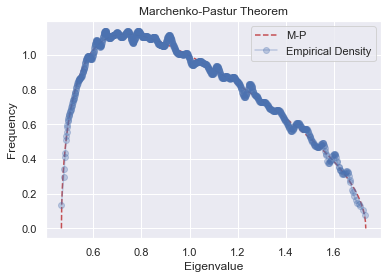

In [11]:
plotting(corr_coef, q);


- The figure shows that the Marchenko–Pastur distribution fits the data well. 

- Thanks to the Marchenko–Pastur theorem, we are able to differentiate the noise and signal; we can now refer to data for which the noise has filtered as denoised.



# References
<hr style = "border:2px solid black" ></hr>


- https://github.com/abdullahkarasan/mlfrm/blob/main/codes/chp_5.ipynb
- Machine Learning for Financial Risk Management with Python Abdullah Karasan

